# Example

In [7]:
import numpy as np
import cv2 as cv
import pandas as pd
import os
from glob import glob
from matplotlib import pyplot as plt

from utpnerves.preprocessing import imagen_proceso, remover_areas, aumento_tam, cuadrar_rect, dim_rec, unet


def viz(img):
    plt.imshow(img_array, cmap='gray')
    plt.axis('off')

In [3]:
list_imgs = glob('assets/imgs/*.jpg')
list_imgs

['assets/imgs/CPD09042021001__20aguja_t_21_4.jpg',
 'assets/imgs/CPD09042021001_t_26_4.jpg',
 'assets/imgs/CPD09042021002_t_51_85.jpg',
 'assets/imgs/CPD09042021002_t_23_9.jpg',
 'assets/imgs/CPD09042021001_t_41_9.jpg']

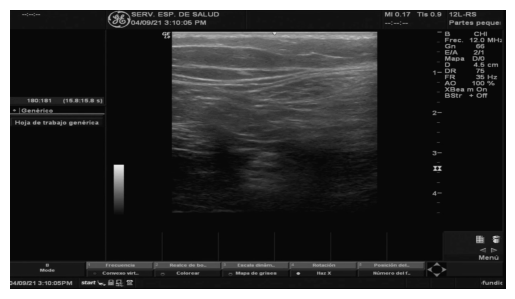

In [8]:
img_path = np.random.choice(list_imgs)
img_array = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
viz(img_array)

In [10]:
modelo = unet()
# Cargar los pesos pre-entrenados del modelo
modelo.load_weights(os.path.join('assets', 'models', 'pesosBalanceBlancos.h5'))
# Procesar la imagen-array
img_process = imagen_proceso(img_array)
# Pasar la imagen procesada a la etapa de inferencia
prediccion = modelo.predict(img_process)
# Limitar la predicción
aux = prediccion < 1.0
prediccion[aux] = 0
# Pasar de un tensor-imagen a una imagen que se pueda mostrar
prediccion = prediccion[0, :, :, 0]
# Eliminar areas pequeñas de la imagen
img_areas_remove = remover_areas(prediccion)
# Redondear los valores del preproces anterior
img_round = np.round(aumento_tam(img_areas_remove, img_array.shape))
# Calcular el rectángulo que encierra la predicción
mask_rectangle = cuadrar_rect(img_round)
# cinfigurar el rectangulo como una imagen
final_image = dim_rec(mask_rectangle, img_array)  # nos interesa esta
# Multiplicar el rectángulo con la imagen original

2022-11-25 10:25:21.754863: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yeison/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-25 10:25:21.754886: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-25 10:25:21.754903: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (archlinux): /proc/driver/nvidia/version does not exist
2022-11-25 10:25:21.755098: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 263ms/step


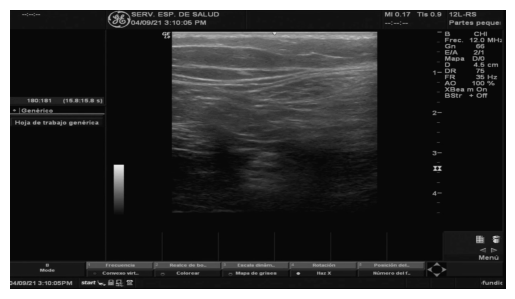

In [11]:
viz(final_image)